# **Forecasting of COVID-19 Cases and Deaths In the region of Souss-Massa Morocco Using LSTM**

In [ ]:
# %pip install tabula-py
# %pip install pandas
# %pip install bs4
# %pip install requests


# Import package

In [2]:
# from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import LSTM, Dense,Dropout,Input
import os
from tensorflow.keras.callbacks import TensorBoard
# from tabula import read_pdf


# Data collecting

In [ ]:
page = requests.get("http://www.covidmaroc.ma/Documents/BULLETIN/COVID-19.Morocco.13.19.05.2023.pdf", headers=headers, stream=True)
soup = BeautifulSoup(page.content,"html.parser")
date_page = soup.select('td[class = "ms-rteTableOddCol-5"]')
dates_span=[]
for date_span in date_page:
  unique_date  = date_span.select('span', {'class' : "ms-rteTableOddCol-5"})
  dates_span.append(unique_date)
dates_span
dates=[]
for global_date in dates_span:
  for date in global_date:
    cov_date = date.get_text()
    cov_date = cov_date.strip().split('\n')[0]
    dates.append(cov_date)

# dates

# pdf = pdfquery.PDFQuery("http://www.covidmaroc.ma/Documents/BULLETIN/COVID-19.Morocco.13.19.05.2023.pdf")

In [ ]:
dates=[]
for month in range(1,7):
  for day in range(1,32):
    if 1 <= month < 10 :
      if 1 <= day < 10 :
        date = "0"+str(day)+"."+str(month)+".21"
      else :
        date = str(day)+"."+str(month)+".21"
    else :
      if 1 <= day < 10 :
        date = "0"+str(day)+"."+str(month)+".21"
      else :
        date = str(day)+"."+str(month)+".21"
    dates.append(date)

dates.remove('30.2.21')
dates.remove('02.2.21')
dates.remove('31.2.21')
dates.remove('29.2.21')
dates.remove('31.4.21')
dates.remove('31.6.21')

print(dates)

['01.1.21', '02.1.21', '03.1.21', '04.1.21', '05.1.21', '06.1.21', '07.1.21', '08.1.21', '09.1.21', '10.1.21', '11.1.21', '12.1.21', '13.1.21', '14.1.21', '15.1.21', '16.1.21', '17.1.21', '18.1.21', '19.1.21', '20.1.21', '21.1.21', '22.1.21', '23.1.21', '24.1.21', '25.1.21', '26.1.21', '27.1.21', '28.1.21', '29.1.21', '30.1.21', '31.1.21', '01.2.21', '03.2.21', '04.2.21', '05.2.21', '06.2.21', '07.2.21', '08.2.21', '09.2.21', '10.2.21', '11.2.21', '12.2.21', '13.2.21', '14.2.21', '15.2.21', '16.2.21', '17.2.21', '18.2.21', '19.2.21', '20.2.21', '21.2.21', '22.2.21', '23.2.21', '24.2.21', '25.2.21', '26.2.21', '27.2.21', '28.2.21', '01.3.21', '02.3.21', '03.3.21', '04.3.21', '05.3.21', '06.3.21', '07.3.21', '08.3.21', '09.3.21', '10.3.21', '11.3.21', '12.3.21', '13.3.21', '14.3.21', '15.3.21', '16.3.21', '17.3.21', '18.3.21', '19.3.21', '20.3.21', '21.3.21', '22.3.21', '23.3.21', '24.3.21', '25.3.21', '26.3.21', '27.3.21', '28.3.21', '29.3.21', '30.3.21', '31.3.21', '01.4.21', '02.4.21'

In [ ]:
Cases = []
cities = ["Agadir-Ida -Ou-Tanane","Inezgane- Ait Melloul","Taroudannt","Tiznit","Chtouka- Ait Baha","Tata"]
Deaths = []
city = []
days = []


for date in dates:
  pdf_file = read_pdf("C:/oussamaboussaid/DataSet/"+date+".COVID-19.pdf",pages="all",stream="True",encoding='latin1')
  for pdf in pdf_file[-2].values:
    if pdf[0] in cities:
      city.append(pdf[0])
      print(city)
      days.append(date)
      Cases.append(pdf[1])
      Deaths.append(pdf[2])

print(Cases)
print(Deaths)

In [ ]:
print(len(Deaths))
print(len(days))
print(len(city))

400
400
400


**Creat DataSet**

In [ ]:
Covid_dataSet_dict = {
    "Deaths":Deaths,
    "Cases":Cases,
    "dates":days,
    "cities":city
}
Covid_dataSet = pd.DataFrame(Covid_dataSet_dict)

,Deaths,Cases,dates,cities
0,2,48,01.1.21,Agadir-Ida -Ou-Tanane
1,NaN,37,01.1.21,Inezgane- Ait Melloul
2,NaN,35,01.1.21,Tiznit
3,NaN,16,01.1.21,Chtouka- Ait Baha
4,2,13,01.1.21,Taroudannt
...,...,...,...,...
395,NaN,1,29.6.21,Taroudannt
396,NaN,31,30.6.21,Agadir-Ida -Ou-Tanane
397,NaN,26,30.6.21,Inezgane- Ait Melloul
398,NaN,4,30.6.21,Tiznit


In [ ]:
Covid_dataSet


,Deaths,Cases,dates,cities
0,2,48,01.1.21,Agadir-Ida -Ou-Tanane
1,NaN,37,01.1.21,Inezgane- Ait Melloul
2,NaN,35,01.1.21,Tiznit
3,NaN,16,01.1.21,Chtouka- Ait Baha
4,2,13,01.1.21,Taroudannt
...,...,...,...,...
395,NaN,1,29.6.21,Taroudannt
396,NaN,31,30.6.21,Agadir-Ida -Ou-Tanane
397,NaN,26,30.6.21,Inezgane- Ait Melloul
398,NaN,4,30.6.21,Tiznit


**Save DataSet As CSV File**

In [ ]:
Covid_dataSet.to_csv("Covid_dataSet.csv", index=False)

# Data Preprocessing (Data Cleaning, Data Visualisation, Scaling and  Normalizing cte..)



<h2> DataSet Summary

**Load The Data**

In [5]:
Covid_data = pd.read_csv("Covid_dataSet.csv")

In [ ]:
#show the first 10 rows of the DataSet
Covid_data.head(20)

,Deaths,Cases,dates,cities
0,2,48.0,01.1.21,Agadir-Ida -Ou-Tanane
1,NaN,37.0,01.1.21,Inezgane- Ait Melloul
2,NaN,35.0,01.1.21,Tiznit
3,NaN,16.0,01.1.21,Chtouka- Ait Baha
4,2,13.0,01.1.21,Taroudannt
5,2,64.0,02.1.21,Agadir-Ida -Ou-Tanane
6,NaN,22.0,02.1.21,Inezgane- Ait Melloul
7,NaN,11.0,02.1.21,Taroudannt
8,NaN,10.0,02.1.21,Chtouka- Ait Baha
9,1,9.0,02.1.21,Tiznit


In [ ]:
# describe the DataSet
print(Covid_data.describe())

print("\n**********************\n")

# get some infos about the DataSet
print(Covid_data.info())

       Deaths Cases    dates                 cities
count     108   399      400                    400
unique     10    60      110                      6
top         1     1  23.1.21  Agadir-Ida -Ou-Tanane
freq       36    64        6                    108

**********************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Deaths  108 non-null    object
 1   Cases   399 non-null    object
 2   dates   400 non-null    object
 3   cities  400 non-null    object
dtypes: object(4)
memory usage: 12.6+ KB
None


<h2>Data Cleaning<h2>

**Detect Missing Values**

In [ ]:
Covid_data.isnull().sum()

Deaths    292
Cases       1
dates       0
cities      0
dtype: int64

In [ ]:
Covid_data[Covid_data['Deaths'].isnull()]

,Deaths,Cases,dates,cities
1,NaN,37.0,01.1.21,Inezgane- Ait Melloul
2,NaN,35.0,01.1.21,Tiznit
3,NaN,16.0,01.1.21,Chtouka- Ait Baha
6,NaN,22.0,02.1.21,Inezgane- Ait Melloul
7,NaN,11.0,02.1.21,Taroudannt
...,...,...,...,...
395,NaN,1.0,29.6.21,Taroudannt
396,NaN,31.0,30.6.21,Agadir-Ida -Ou-Tanane
397,NaN,26.0,30.6.21,Inezgane- Ait Melloul
398,NaN,4.0,30.6.21,Tiznit


In [ ]:
Covid_data[Covid_data['Cases'].isnull()]

,Deaths,Cases,dates,cities
38,NaN,NaN,08.1.21,Tata


**Convert Our Date column to datetime**

In [ ]:
# dates's type is String
Covid_data["dates"].iloc[0]

'01.1.21'

In [ ]:
# thpr of Dates colomn is Object
Covid_data["dates"].dtype

dtype('O')

In [6]:
# Convert Date column to datetime
Covid_data["dates"] = pd.to_datetime(Covid_data["dates"],dayfirst=True).dt.strftime('%d-%m-%Y')
Covid_data["dates"]

0      01-01-2021
1      01-01-2021
2      01-01-2021
3      01-01-2021
4      01-01-2021
          ...    
395    29-06-2021
396    30-06-2021
397    30-06-2021
398    30-06-2021
399    30-06-2021
Name: dates, Length: 400, dtype: object

In [ ]:
Covid_data["dates"].iloc[0]

'01-01-2021'

**Remove all withspaces & "?" char**  

In [ ]:
Covid_data["Deaths"][232:260]

232                 NaN
233                   1
234                 NaN
235                 NaN
236                 NaN
237                 NaN
238                 NaN
239                 NaN
240    ?????? ??? ?????
241            ????????
242     ?????? ??? ????
243     ?????? ??? ????
244    ?????? ??? ?????
245     ?????? ??? ????
246     ?????? ??? ????
247               ?????
248            ????????
249                 NaN
250                 NaN
251                 NaN
252                 NaN
253                 NaN
254                 NaN
255                 NaN
256                   2
257                 NaN
258                 NaN
259                 NaN
Name: Deaths, dtype: object

In [7]:
Covid_data["Deaths"] = Covid_data["Deaths"].replace('[\?\s]+', '0', regex=True)
Covid_data["Deaths"][232:260]

232    NaN
233      1
234    NaN
235    NaN
236    NaN
237    NaN
238    NaN
239    NaN
240      0
241      0
242      0
243      0
244      0
245      0
246      0
247      0
248      0
249    NaN
250    NaN
251    NaN
252    NaN
253    NaN
254    NaN
255    NaN
256      2
257    NaN
258    NaN
259    NaN
Name: Deaths, dtype: object

**Replace All NaN Values ( Numeric values ) with Median**

In [8]:
Covid_data.Deaths = Covid_data.Deaths.fillna(Covid_data.Deaths.median())
Covid_data.Cases = Covid_data.Cases.fillna(Covid_data.Cases.median())
# Covid_data.Deaths = Covid_data.Deaths.fillna(0)
# Covid_data.Cases = Covid_data.Cases.fillna(0)

Covid_data

,Deaths,Cases,dates,cities
0,2,48.0,01-01-2021,Agadir-Ida -Ou-Tanane
1,0.0,37.0,01-01-2021,Inezgane- Ait Melloul
2,0.0,35.0,01-01-2021,Tiznit
3,0.0,16.0,01-01-2021,Chtouka- Ait Baha
4,2,13.0,01-01-2021,Taroudannt
...,...,...,...,...
395,0.0,1.0,29-06-2021,Taroudannt
396,0.0,31.0,30-06-2021,Agadir-Ida -Ou-Tanane
397,0.0,26.0,30-06-2021,Inezgane- Ait Melloul
398,0.0,4.0,30-06-2021,Tiznit


In [ ]:
Covid_data.isnull().sum()

Deaths    0
Cases     0
dates     0
cities    0
dtype: int64

**Convert Deaths Column to int**

In [9]:
#convert the Deaths column to int
Covid_data["Deaths"] = Covid_data["Deaths"].astype(float).astype(int)
Covid_data["Deaths"]

0      2
1      0
2      0
3      0
4      2
      ..
395    0
396    0
397    0
398    0
399    0
Name: Deaths, Length: 400, dtype: int64

**Convert Cases Column to int**

In [ ]:
Covid_data["Cases"].dtype

dtype('float64')

In [10]:
Covid_data["Cases"] = Covid_data["Cases"].astype(int)
Covid_data["Cases"]

0      48
1      37
2      35
3      16
4      13
       ..
395     1
396    31
397    26
398     4
399     2
Name: Cases, Length: 400, dtype: int64

In [ ]:
Covid_data

,Deaths,Cases,dates,cities
0,2,48,01-01-2021,Agadir-Ida -Ou-Tanane
1,0,37,01-01-2021,Inezgane- Ait Melloul
2,0,35,01-01-2021,Tiznit
3,0,16,01-01-2021,Chtouka- Ait Baha
4,2,13,01-01-2021,Taroudannt
...,...,...,...,...
395,0,1,29-06-2021,Taroudannt
396,0,31,30-06-2021,Agadir-Ida -Ou-Tanane
397,0,26,30-06-2021,Inezgane- Ait Melloul
398,0,4,30-06-2021,Tiznit


<h2> Data Visualization

In [11]:
#Groupe all Case and Death data by City
Covid_data_GpByCyties = Covid_data.groupby("cities")
Covid_data_GpByCyties

**Distribuation of Cases in different City**







In [ ]:
#Count Number of All Cases in each City
Covid_data_GpByCyties_Cases = Covid_data_GpByCyties.Cases.sum()

#print data
for city, cases in Covid_data_GpByCyties_Cases.items():
    print("Number of Cases in "+city+" : ",cases,end="\n")

print("\nSum of all Case in all Cities is ",sum(Covid_data_GpByCyties_Cases))

Number of Cases in Agadir-Ida -Ou-Tanane :  2072
Number of Cases in Chtouka- Ait Baha :  212
Number of Cases in Inezgane- Ait Melloul :  832
Number of Cases in Taroudannt :  246
Number of Cases in Tata :  91
Number of Cases in Tiznit :  411

Sum of all Case in all Cities is  3864


In [ ]:
len(Covid_data_GpByCyties.cities)

6

In [ ]:
# Convert Valus to percent (case * 100)/3858
Cases_In_City_per = []

for nb_case in Covid_data_GpByCyties_Cases:
  case_per = (nb_case * 100)/3858
  Cases_In_City_per.append(case_per)

#print data
cities = ["Agadir-Ida -Ou-Tanane","Inezgane- Ait Melloul","Taroudannt","Tiznit","Chtouka- Ait Baha","Tata"]
for ele in range(len(cities)) :
  print("Number of Cases in "+cities[ele]+" : {:.2f}%".format(Cases_In_City_per[ele]),end="\n")

print("\nSum of all Case in all Cities is {:.2f}%".format(sum(Cases_In_City_per)))

Number of Cases in Agadir-Ida -Ou-Tanane : 53.71%
Number of Cases in Inezgane- Ait Melloul : 5.50%
Number of Cases in Taroudannt : 21.57%
Number of Cases in Tiznit : 6.38%
Number of Cases in Chtouka- Ait Baha : 2.36%
Number of Cases in Tata : 10.65%

Sum of all Case in all Cities is 100.16%


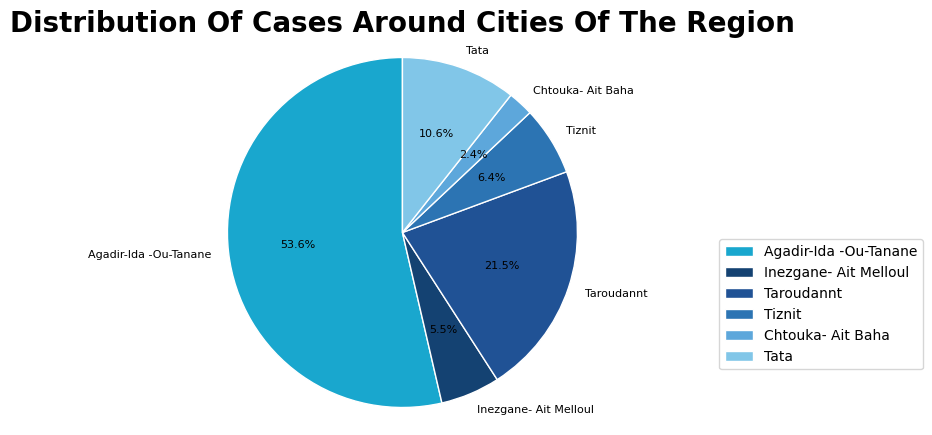

In [ ]:
# Pie chart
colors=["#19A7CE","#144272","#205295","#2C74B3","#5DA7DB","#81C6E8"]
wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}

fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.pie(Cases_In_City_per,labels=cities,autopct='%1.1f%%',colors=colors,wedgeprops=wedgeprops,  startangle=90, textprops={'fontsize': 8})
ax1.axis('equal')
plt.legend(labels=cities, loc='best', bbox_to_anchor=(1, 0.5))

ax1.set_title('Distribution Of Cases Around Cities Of The Region', fontsize=20, fontweight='bold')

plt.show()

**Distribuation of Deaths in different City**







In [ ]:
#Count Number of All Deaths in each City
Covid_data_GpByCyties_Deaths = Covid_data_GpByCyties.Deaths.sum()

#print data
for city, cases in Covid_data_GpByCyties_Deaths.items():
    print("Number of Deaths in "+city+" : ",cases,end="\n")

print("\nSum of all Deaths in all Cities is ",sum(Covid_data_GpByCyties_Deaths))

Number of Deaths in Agadir-Ida -Ou-Tanane :  29
Number of Deaths in Chtouka- Ait Baha :  0
Number of Deaths in Inezgane- Ait Melloul :  11
Number of Deaths in Taroudannt :  12
Number of Deaths in Tata :  1
Number of Deaths in Tiznit :  17

Sum of all Deaths in all Cities is  70


In [ ]:
# Convert Valus to percent (Deaths * 100)/70
Cases_In_City_Deaths_per = []

for nb_death in Covid_data_GpByCyties_Deaths:
  death_per = (nb_death * 100)/70
  Cases_In_City_Deaths_per.append(death_per)

#print data
cities = ["Agadir-Ida -Ou-Tanane","Inezgane- Ait Melloul","Taroudannt","Tiznit","Chtouka- Ait Baha","Tata"]
for ele in range(len(cities)) :
  print("Number of Deaths in "+cities[ele]+" : {:.2f}%".format(Cases_In_City_Deaths_per[ele]),end="\n")

print("\nSum of all Case in all Cities is {:.2f}%".format(sum(Cases_In_City_Deaths_per)))

Number of Deaths in Agadir-Ida -Ou-Tanane : 41.43%
Number of Deaths in Inezgane- Ait Melloul : 0.00%
Number of Deaths in Taroudannt : 15.71%
Number of Deaths in Tiznit : 17.14%
Number of Deaths in Chtouka- Ait Baha : 1.43%
Number of Deaths in Tata : 24.29%

Sum of all Case in all Cities is 100.00%


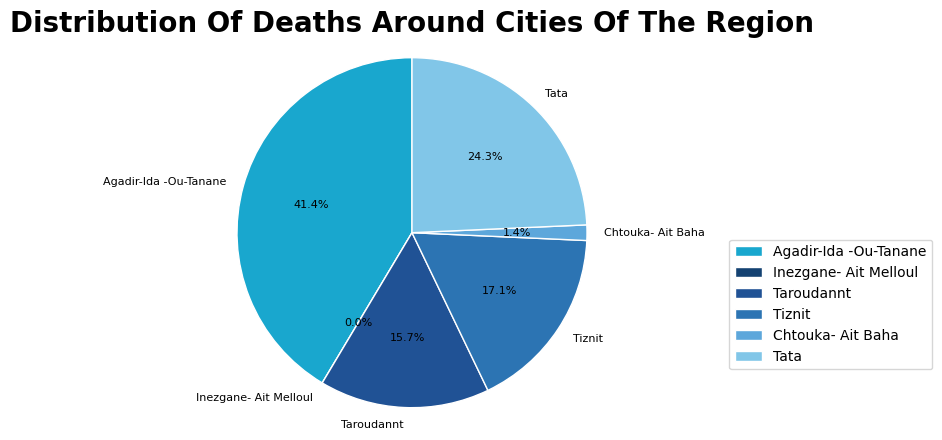

In [ ]:
# Pie chart
colors=["#19A7CE","#144272","#205295","#2C74B3","#5DA7DB","#81C6E8"]

# fig1 = plt.figure(figsize=(12, 5))
# ax1 = fig1.add_subplot(121)  # Pie chart
# ax2 = fig1.add_subplot(122)

wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.pie(Cases_In_City_Deaths_per,labels=cities,autopct='%1.1f%%',colors=colors,wedgeprops=wedgeprops, startangle=90, textprops={'fontsize': 8})
ax1.axis('equal')
plt.legend(labels=cities, loc='best', bbox_to_anchor=(1, 0.5))

ax1.set_title('Distribution Of Deaths Around Cities Of The Region', fontsize=20, fontweight='bold')

plt.show()

**Sum of Cases in Around cities in the period of 6 months**

In [ ]:
Covid_data_GpByCyties_Cases_df = pd.DataFrame(Covid_data_GpByCyties_Cases)

In [ ]:
Covid_data_GpByCyties_Cases_df.columns

Index(['Cases'], dtype='object')

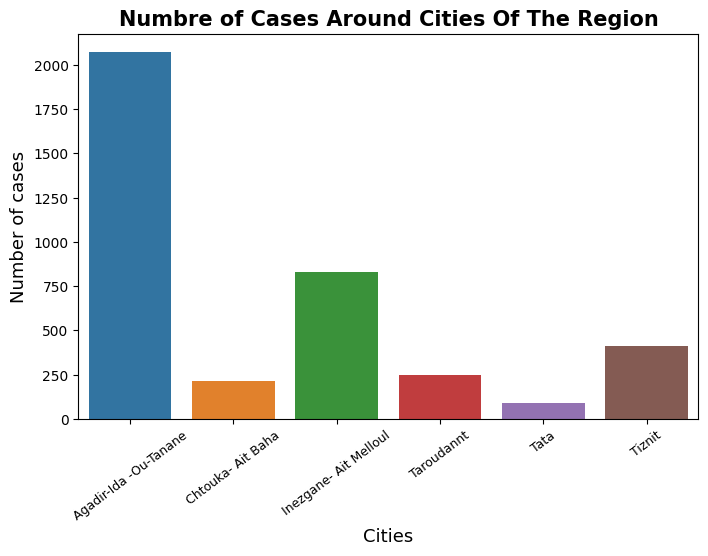

In [ ]:
##  Bar Plot
fig, ax = plt.subplots(figsize=(8, 5))
plt.title('Numbre of Cases Around Cities Of The Region', fontsize=15, fontweight='bold')
sns.barplot(x=Covid_data_GpByCyties_Cases_df.index,y=Covid_data_GpByCyties_Cases_df.Cases)
ax.set_xlabel('Cities', size=13)
ax.set_ylabel('Number of cases', size=13)
plt.xticks(rotation=37, size=9)
plt.show()

**Sum of Cases in Around Deaths in the period of 6 months**

In [ ]:
Covid_data_GpByCyties_Deaths_df = pd.DataFrame(Covid_data_GpByCyties_Deaths)

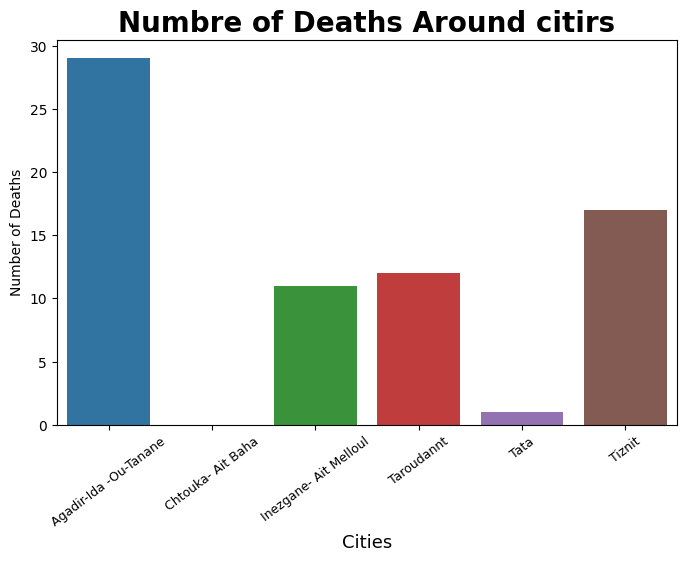

In [ ]:
##  Bar Plot
fig, ax = plt.subplots(figsize=(8, 5))
plt.title('Numbre of Deaths Around citirs', fontsize=20, fontweight='bold')
sns.barplot(x=Covid_data_GpByCyties_Deaths_df.index,y=Covid_data_GpByCyties_Deaths_df.Deaths)
ax.set_xlabel('Cities', size=13)
ax.set_ylabel('Number of Deaths', size=10)
plt.xticks(rotation=37, size=9)
plt.show()

**variation of Cases Over Dates In each city**

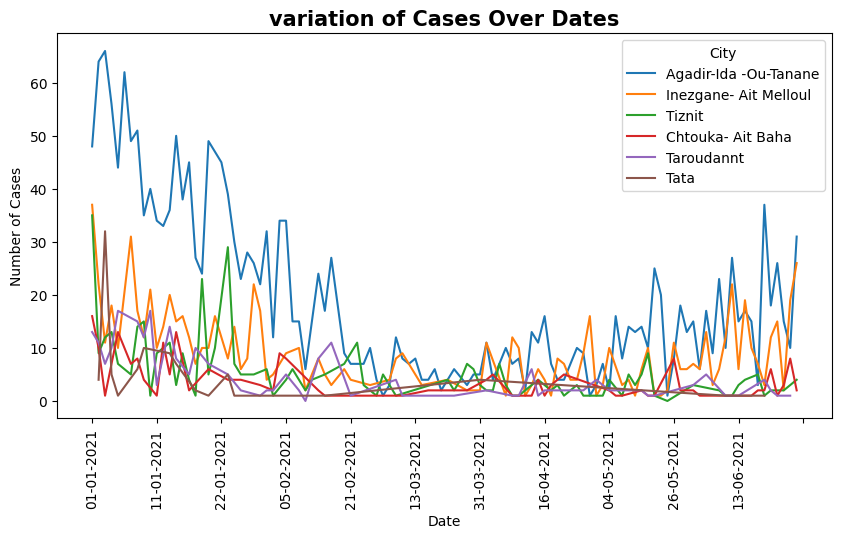

In [ ]:
# Line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=Covid_data, x=Covid_data.dates, y=Covid_data.Cases, hue=Covid_data.cities)
plt.title('variation of Cases Over Dates', fontsize=15, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.legend(title='City', loc='upper right',)

#display only the month
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(12))

plt.show()


**variation of Deaths Over Dates In each city**

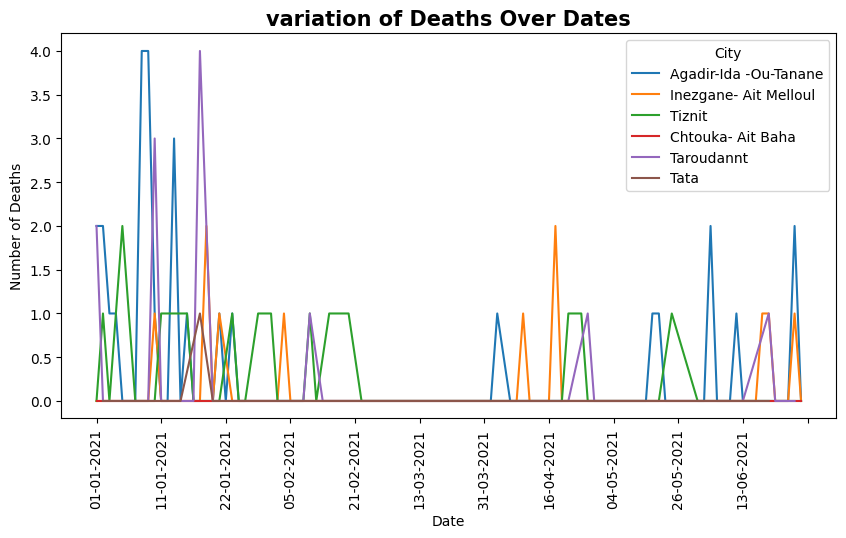

In [ ]:
# line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=Covid_data, x="dates", y="Deaths", hue="cities")
plt.title('variation of Deaths Over Dates', fontsize=15, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=90)
plt.legend(title='City', loc='upper right',)

#display only the month
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(12))

plt.show()


**Daily Covid 19 Cases in the region**

In [ ]:
 #set dates as index
Covid_data_toplot = Covid_data.set_index('dates')

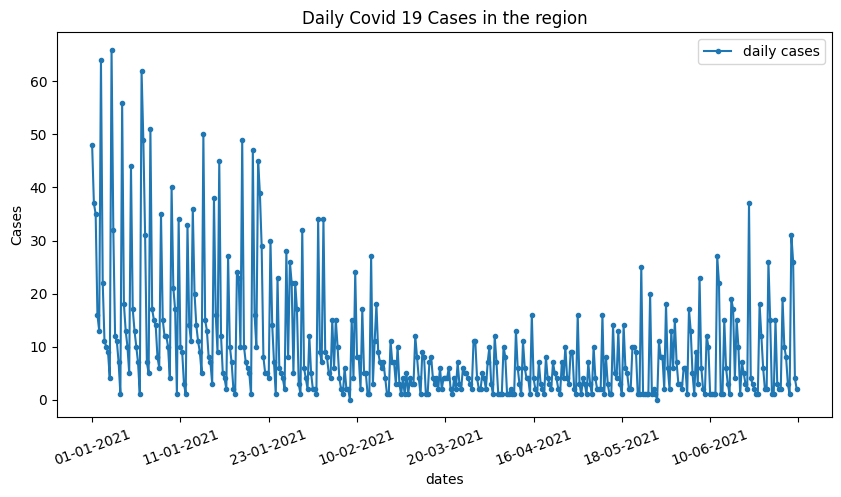

In [ ]:
Covid_data_toplot.Cases.plot(title="Daily Covid 19 Cases in the region",marker=".",figsize=(10,5),label="daily cases")
plt.ylabel("Cases")
plt.xlabel("dates")
plt.xticks(rotation=20)
plt.legend()
plt.show()

**Daily Covid 19 Deaths in the region**

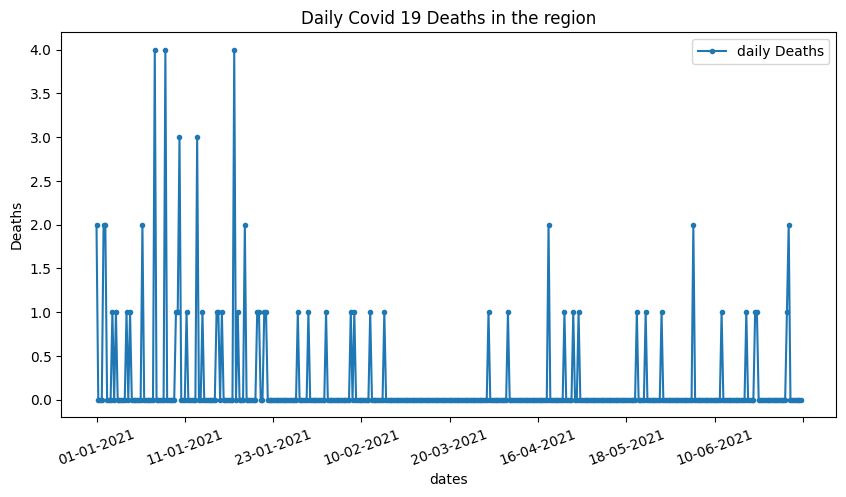

In [ ]:
Covid_data_toplot.Deaths.plot(title="Daily Covid 19 Deaths in the region",marker=".",figsize=(10,5),label="daily Deaths")
plt.ylabel("Deaths")
plt.xlabel("dates")
plt.xticks(rotation=20)
plt.legend()
plt.show()

**Density of Deaths & Cases**

Text(0.5, 0.98, 'Density of Deaths & Cases in the Period between 1/1/21 and 30/6/21')

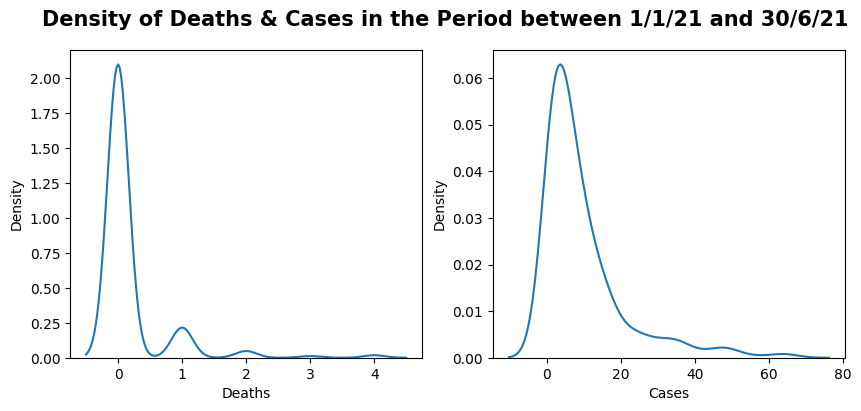

In [ ]:
# Kde plot
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10, 4))
# plt.figure(figsize=(15,8))
sns.kdeplot(data=Covid_data,x='Deaths',ax=ax1)
sns.kdeplot(data=Covid_data,x='Cases',ax=ax2)

fig.suptitle("Density of Deaths & Cases in the Period between 1/1/21 and 30/6/21", fontsize=15, fontweight='bold')

**Visualisation of  where death cases are reported**

In [ ]:
Covid_data.cities.unique()

array(['Agadir-Ida -Ou-Tanane', 'Inezgane- Ait Melloul', 'Tiznit',
       'Chtouka- Ait Baha', 'Taroudannt', 'Tata'], dtype=object)

In [ ]:
Covid_data_coord.lon[Covid_data_coord.city == 'Agadir-Ida -Ou-Tanane']

0    30.4278
Name: lon, dtype: float64

In [39]:
map_Covid_data = {
    'cities': Covid_data.cities.unique(),
    'Cases' : Covid_data_GpByCyties.Cases.sum().values,
    'Deaths' : Covid_data_GpByCyties.Deaths.sum().values,
}
map_Covid_data_df = pd.DataFrame(map_Covid_data)
map_Covid_data_df

,cities,Cases,Deaths
0,Agadir-Ida -Ou-Tanane,2072,29
1,Inezgane- Ait Melloul,212,0
2,Tiznit,832,11
3,Chtouka- Ait Baha,246,12
4,Taroudannt,91,1
5,Tata,411,17


In [48]:
import folium

Covid_data_coord = pd.DataFrame({
    'city' : Covid_data.cities.unique(),
    'lon':[30.4278,-9.439073698,-9.733198,-9.30909, -8.8666632,-7.83333],
    'lat':[-9.5981,30.357038687,29.696901,30.02948,30.4666648,29.66667]
})

Morocco_map = folium.Map(location=[31.7917, -7.0926], zoom_start=7, tiles='Stamen Terrain')

for index, row in map_Covid_data_df.iterrows():
    if row['cities'] in list(Covid_data_coord.city):
        latitude = Covid_data_coord.lat[Covid_data_coord.city == row['cities']].values[0]
        longitude = Covid_data_coord.lon[Covid_data_coord.city == row['cities']].values[0]
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=row['Cases'] * 0,
            popup=f'City: {row["cities"]}<br>Cases: {row["Cases"]}<br>Deaths: {row["Cases"]}',
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        ).add_to(Morocco_map)

# Save the map
Morocco_map.save('styled_morocco_map.html')
Morocco_map

**Relationships between deaths & Cases**

In [ ]:
corr_Death_cases = Covid_data.corr()
corr_Death_cases

<ipython-input-38-e60862a0fa6f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_Death_cases = Covid_data.corr()


,Deaths,Cases
Deaths,1.000000,0.303203
Cases,0.303203,1.000000


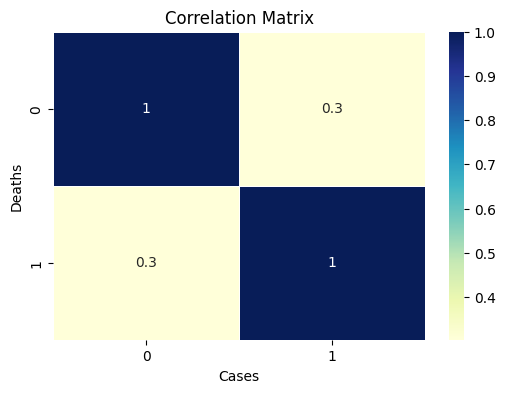

In [ ]:
# Define the correlation matrix
correlation_matrix = np.array(corr_Death_cases)

# Create a heatmap plot
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True,linewidths=.5,cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.show()

# Forecasting Deaths and Cases Using LSTM Model


<h2> Preper Data for The model

In [ ]:
# make Dates column as index column
Covid_data = Covid_data.set_index('dates')
Covid_data

We split the X and y in such a way that X will contain cases for a certain amount of previous days(time_step)
and y contains the reading for the next day.

This way the model will be trained to predict the number of cases on a certain day based on the trend in the number of cases within the previous time_steps number of days

In [ ]:
import random

# features to train
X_features = Covid_data[ ['Cases','Deaths']]

#normlise X_features
scaler = MinMaxScaler(feature_range=(0,1))
scaled_X_features = scaler.fit_transform(X_features)
print("features shape : ",scaled_X_features.shape)


# Split the data into training and testing sets
train_size = int(0.8 * len(scaled_X_features))
train_data = scaled_X_features[:train_size]
test_data = scaled_X_features[train_size:]
# random.shuffle(train_data)
# random.shuffle(test_data)

# Create input features and labels for training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define the input sequence length (timesteps) for the LSTM model One month !!!
sequence_length = 30
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


print("*****************************")
print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",X_test.shape)
print("y_test shape : ",y_test.shape)


features shape :  (400, 2)
*****************************
X_train shape :  (290, 30, 2)
y_train shape :  (290, 2)
X_test shape :  (50, 30, 2)
y_test shape :  (50, 2)


# Model Architecture


In [ ]:
!pip install Tensorboard

In [ ]:
# creat log folder
log_dir = os.path.join('Logs')
TB_callback = TensorBoard(log_dir=log_dir)

In [ ]:
# Build the LSTM model
model = Sequential()
# Add a LSTM layer with 64 internal units
model.add(LSTM(64, input_shape=(sequence_length,2),activation='relu'))
# model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2)) # Two units (class Cases and Deaths)
# compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 64)                17152     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 2)                 130       
                                                                 
Total params: 17282 (67.51 KB)
Trainable params: 17282 (67.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train The Model


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100,validation_split=0.2,validation_data=[X_test, y_test], batch_size=56,verbose=2)

Epoch 1/100
6/6 - 1s - loss: 0.0134 - accuracy: 0.9069 - val_loss: 0.0154 - val_accuracy: 0.9200 - 827ms/epoch - 138ms/step
Epoch 2/100
6/6 - 0s - loss: 0.0119 - accuracy: 0.9172 - val_loss: 0.0156 - val_accuracy: 0.9200 - 467ms/epoch - 78ms/step
Epoch 3/100
6/6 - 0s - loss: 0.0118 - accuracy: 0.9000 - val_loss: 0.0157 - val_accuracy: 0.9200 - 452ms/epoch - 75ms/step
Epoch 4/100
6/6 - 1s - loss: 0.0122 - accuracy: 0.9103 - val_loss: 0.0161 - val_accuracy: 0.9200 - 542ms/epoch - 90ms/step
Epoch 5/100
6/6 - 0s - loss: 0.0126 - accuracy: 0.9103 - val_loss: 0.0162 - val_accuracy: 0.9200 - 447ms/epoch - 74ms/step
Epoch 6/100
6/6 - 0s - loss: 0.0123 - accuracy: 0.8862 - val_loss: 0.0161 - val_accuracy: 0.9200 - 490ms/epoch - 82ms/step
Epoch 7/100
6/6 - 0s - loss: 0.0144 - accuracy: 0.9103 - val_loss: 0.0159 - val_accuracy: 0.9200 - 315ms/epoch - 53ms/step
Epoch 8/100
6/6 - 0s - loss: 0.0146 - accuracy: 0.9103 - val_loss: 0.0161 - val_accuracy: 0.9200 - 422ms/epoch - 70ms/step
Epoch 9/100
6/6

# Evaluate The Model


In [ ]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)


2/2 [==============================] - 0s 16ms/step - loss: 0.0163 - accuracy: 0.9200


**visualize loss and accurancy**

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir={log_dir}

# Save The Model

In [ ]:
model.save("Covid19_agadir-souss.h5")

In [ ]:
import shutil
shutil.make_archive('Logs', 'zip', 'Logs')

'/content/Logs.zip'

In [ ]:
! unzip -q Logs.zip

# **STAY SAFE !**